#Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
# from ucimlrepo import fetch_ucirepo

C:\Users\PMLS\AppData\Local\Temp\ipykernel_8552\1643193505.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#Drive Connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DATASET Loading

In [2]:

# Load the dataset
# Make sure to replace 'path_to_dataset.csv' with your actual file path
df = pd.read_csv('Grouped.csv')

# Assume the last column is the label. If not, adjust accordingly.
features = df.columns[:-1]  # All columns except the last one
label = df.columns[-1]  # The last column

# Check for missing values (just to confirm)
if df.isnull().values.any():
    df.fillna(df.mean(), inplace=True)  # Or choose another imputing strategy

#SWARM DATA CODE

In [4]:
# Identify the column with non-numeric values
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Non-numeric column: {column}")

In [5]:
# Drop the 'x1' column
df.drop('x1', axis=1, inplace=True)

# Update the features list
features = df.columns[:-1]

# Rerun the code from the point where you encountered the error
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# ... Continue with the remaining code

In [6]:
# Feature selection
# Remove features with low variance
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
df_reduced = sel.fit_transform(df[features])

# Select the best k features, adjust k based on your need
k = 1000  # Example: choose 100 best features
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(df_reduced, df[label])

# Split the dataset into the train
# Split the dataset into the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, df[label], test_size=0.3, random_state=42)

In [9]:
X_new.shape

(24016, 1000)

#DECISION TREE

In [ ]:

# Define hyperparameters
criterions = ["gini", "log_loss", "entropy"]
splitters = ["best", "random"]
# Create ranges with integers
max_depths = list(range(1, 20, 3))  # From 1 to 100
min_samples_splits = list(range(2, 20, 3))  # From 2 to 100, stepping by 2
min_samples_leafs = list(range(1, 20, 3))  # From 1 to 100

# Add None to each list
max_depths = [None] + max_depths
max_features = [None, "sqrt", "log2"]
results = []

# Iterate over each combination of hyperparameters
for criterion in criterions:
    for splitter in splitters:
        for max_depth in max_depths:
            for min_samples_split in min_samples_splits:
                for min_samples_leaf in min_samples_leafs:
                    for max_feature in max_features:
                        # Create and fit the model
                        clf = DecisionTreeClassifier(criterion=criterion,
                                                     splitter=splitter,
                                                     max_depth=max_depth,
                                                     min_samples_split=min_samples_split,
                                                     min_samples_leaf=min_samples_leaf,
                                                     max_features=max_feature)
                        clf.fit(X_train, y_train)

                        # Make predictions and evaluate the model
                        predictions = clf.predict(X_test)

                        # Calculate metrics
                        accuracy = accuracy_score(y_test, predictions)
                        precision = precision_score(y_test, predictions, average='macro', zero_division=0)
                        recall = recall_score(y_test, predictions, average='macro', zero_division=0)
                        f1 = f1_score(y_test, predictions, average='macro', zero_division=0)
                        print({'Criterion': criterion,
                                        'Splitter': splitter,
                                        'Max Depth': max_depth,
                                        'Min Samples Split': min_samples_split,
                                        'Min Samples Leaf': min_samples_leaf,
                                        'Max Features': max_feature,
                                        'Accuracy': accuracy,
                                        'Precision': precision,
                                        'Recall': recall,
                                        'F1-Score': f1})
                        # Append results
                        results.append({'Criterion': criterion,
                                        'Splitter': splitter,
                                        'Max Depth': max_depth,
                                        'Min Samples Split': min_samples_split,
                                        'Min Samples Leaf': min_samples_leaf,
                                        'Max Features': max_feature,
                                        'Accuracy': accuracy,
                                        'Precision': precision,
                                        'Recall': recall,
                                        'F1-Score': f1})

# Create DataFrame
df_results = pd.DataFrame(results)

# Save to CSV
filename = 'decisiontreeall_result.csv'
df_results.to_csv(filename, index=False)

print(f"Results saved to: {filename}")

Streaming output truncated to the last 5000 lines.
{'Criterion': 'gini', 'Splitter': 'random', 'Max Depth': None, 'Min Samples Split': 5, 'Min Samples Leaf': 19, 'Max Features': 'log2', 'Accuracy': 0.9770992366412213, 'Precision': 0.9772116395662849, 'Recall': 0.9770211279014045, 'F1-Score': 0.9770905869209234}
{'Criterion': 'gini', 'Splitter': 'random', 'Max Depth': None, 'Min Samples Split': 8, 'Min Samples Leaf': 1, 'Max Features': None, 'Accuracy': 0.998056904927134, 'Precision': 0.9980800393148754, 'Recall': 0.9980366624294027, 'F1-Score': 0.99805642685899}
{'Criterion': 'gini', 'Splitter': 'random', 'Max Depth': None, 'Min Samples Split': 8, 'Min Samples Leaf': 1, 'Max Features': 'sqrt', 'Accuracy': 0.9984732824427481, 'Precision': 0.9984886605998311, 'Recall': 0.9984590786501856, 'F1-Score': 0.9984729265023022}
{'Criterion': 'gini', 'Splitter': 'random', 'Max Depth': None, 'Min Samples Split': 8, 'Min Samples Leaf': 1, 'Max Features': 'log2', 'Accuracy': 0.9986120749479528, 'Pre

#DATA PROCESSING-1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset
dataset_path = '/content/drive/MyDrive/Dataset/decisiontreeall_result _drybean.csv'  # Adjust the path to your dataset
dataset = pd.read_csv(dataset_path)

# Handling missing values
imputer = SimpleImputer(strategy='median')
dataset['Max Depth'] = imputer.fit_transform(dataset[['Max Depth']])

# Manually specify the categorical features to be encoded
categorical_features = ['Criterion', 'Splitter', 'Max Features']
remaining_features = [col for col in dataset.columns if col not in categorical_features + ['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Encoding categorical variables
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical = onehot_encoder.fit_transform(dataset[categorical_features])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

# Combine encoded features with the rest of the dataset
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_feature_names)
remaining_df = dataset[remaining_features]
target_df = dataset[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

full_df = pd.concat([encoded_df, remaining_df.reset_index(drop=True), target_df.reset_index(drop=True)], axis=1)

# Splitting dataset into features (X) and targets (y)
X = full_df.drop(['Accuracy', 'Precision', 'Recall', 'F1-Score'], axis=1)
y = full_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the preprocessed data to a CSV file
preprocessed_data_path = '/content/drive/MyDrive/Dataset/preprocessed_dataset.csv'  # Adjust the path to where you want to save the preprocessed data
full_df.to_csv(preprocessed_data_path, index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#DATA PROCESSING-2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset
dataset_path = '/content/drive/MyDrive/Dataset/decisiontreeall_result _drybean.csv'  # Adjust the path to your dataset
dataset = pd.read_csv(dataset_path)

# Handling missing values
imputer = SimpleImputer(strategy='median')
dataset['Max Depth'] = imputer.fit_transform(dataset[['Max Depth']])

# Manually specify the categorical features to be encoded
categorical_features = ['Criterion', 'Splitter', 'Max Features']
remaining_features = [col for col in dataset.columns if col not in categorical_features + ['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Encoding categorical variables
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical = onehot_encoder.fit_transform(dataset[categorical_features])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

# Combine encoded features with the rest of the dataset
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_feature_names)
remaining_df = dataset[remaining_features]
target_df = dataset[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

full_df = pd.concat([encoded_df, remaining_df.reset_index(drop=True), target_df.reset_index(drop=True)], axis=1)

# Splitting dataset into features (X) and targets (y)
X = full_df.drop(['Accuracy', 'Precision', 'Recall', 'F1-Score'], axis=1)
y = full_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the preprocessed data to a CSV file
preprocessed_data =pd.read_csv('/content/drive/MyDrive/Dataset/preprocessed_dataset.csv')
# Append the new data to the existing DataFrame
full_df = preprocessed_data.append(full_df)
 # Adjust the path to where you want to save the preprocessed data
full_df.to_csv('/content/drive/MyDrive/Dataset/preprocessed_dataset.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-25-075bca5b4d1e>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df = preprocessed_data.append(full_df)


#ANN MODEL

In [ ]:
#If-Else added
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/preprocessed_dataset.csv')

# Assuming the dataset structure matches the expected format
X = data.drop(['Accuracy', 'Precision', 'Recall', 'F1-Score'], axis=1)
y = data[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the ANN model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(4, activation='sigmoid')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/200
303/303 [==============================] - 7s 10ms/step - loss: 0.0529 - mae: 0.1632 - val_loss: 0.0459 - val_mae: 0.1493
Epoch 2/200
303/303 [==============================] - 1s 3ms/step - loss: 0.0409 - mae: 0.1440 - val_loss: 0.0260 - val_mae: 0.1055
Epoch 3/200
303/303 [==============================] - 1s 3ms/step - loss: 0.0163 - mae: 0.0917 - val_loss: 0.0102 - val_mae: 0.0765
Epoch 4/200
303/303 [==============================] - 1s 2ms/step - loss: 0.0090 - mae: 0.0754 - val_loss: 0.0076 - val_mae: 0.0713
Epoch 5/200
303/303 [==============================] - 1s 2ms/step - loss: 0.0072 - mae: 0.0699 - val_loss: 0.0063 - val_mae: 0.0648
Epoch 6/200
303/303 [==============================] - 1s 3ms/step - loss: 0.0059 - mae: 0.0626 - val_loss: 0.0052 - val_mae: 0.0564
Epoch 7/200
303/303 [==============================] - 1s 3ms/step - loss: 0.0046 - mae: 0.0522 - val_loss: 0.0039 - val_mae: 0.0450
Epoch 8/200
303/303 [==============================] - 1s 2ms/step -

#Taking INPUT

In [ ]:
# Interactive Hyperparameter Input
def get_user_input(scaler):
    inputs = {}
    criterion_input = input("Enter Criterion (gini/entropy/log_loss): ")
    if criterion_input in ['gini', 'entropy', 'log_loss']:
        inputs['Criterion'] = criterion_input
    else:
        raise ValueError("Invalid value for Criterion. It must be 'gini', 'entropy', or 'log_loss'.")
    splitters_input = input("Enter Splitters (best/random): ")
    if splitters_input in ['best', 'random']:
        inputs['Splitters'] = splitters_input
    else:
        raise ValueError("Invalid value for Splitters. It must be 'best' or 'random'.")
    max_depth_input = input("Enter Max Depth (integer only): ")
    if max_depth_input.isdigit():
        inputs['Max Depth'] = int(max_depth_input)
    else:
        raise ValueError("Max Depth must be an integer.")
    min_samples_split_input = input("Enter Min Samples Split (>0): ")
    try:
        min_samples_split = float(min_samples_split_input)
        if min_samples_split > 0:
            inputs['Min Samples Split'] = min_samples_split
        else:
            raise ValueError
    except ValueError:
        raise ValueError("Min Samples Split must be a float greater than 0.")
    min_samples_leaf_input = input("Enter Min Samples Leaf (>0): ")
    try:
        min_samples_leaf = float(min_samples_leaf_input)
        if min_samples_leaf > 0:
            inputs['Min Samples Leaf'] = min_samples_leaf
        else:
            raise ValueError
    except ValueError:
        raise ValueError("Min Samples Leaf must be a float greater than 0.")
    max_features_input = input("Enter Max_Features (log2/sqrt/none): ")
    if max_features_input in ['log2', 'sqrt','none']:
        inputs['Max_Features'] = max_features_input
    else:
        raise ValueError("Invalid value for Max_Features. It must be 'log2' or 'sqrt'.")
    input_df = pd.DataFrame([inputs])
    input_df = pd.get_dummies(input_df)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[X.columns]
    input_scaled = scaler.transform(input_df)
    return input_scaled

# Prediction
user_input_scaled = get_user_input(scaler)
predicted_metrics = model.predict(user_input_scaled)
print(f"Predicted Performance Metrics: Accuracy={predicted_metrics[0][0]}, Precision={predicted_metrics[0][1]}, Recall={predicted_metrics[0][2]}, F1-Score={predicted_metrics[0][3]}")


Enter Criterion (gini/entropy/log_loss): gini
Enter Splitters (best/random): best
Enter Max Depth (integer only): 10
Enter Min Samples Split (>0): 5
Enter Min Samples Leaf (>0): 5
Enter Max_Features (log2/sqrt/none): sqrt
1/1 [==============================] - 0s 156ms/step
Predicted Performance Metrics: Accuracy=0.8942431211471558, Precision=0.9043512940406799, Recall=0.8990117907524109, F1-Score=0.9024996161460876


#Graph

**Scatter Plot of Actual vs. Predicted Values**
This is a straightforward way to visualize how well your predicted values match the actual values. A perfect model would result in a straight line at a 45-degree angle.

**Distribution of Prediction Errors for Each Metric**

76/76 [==============================] - 0s 5ms/step


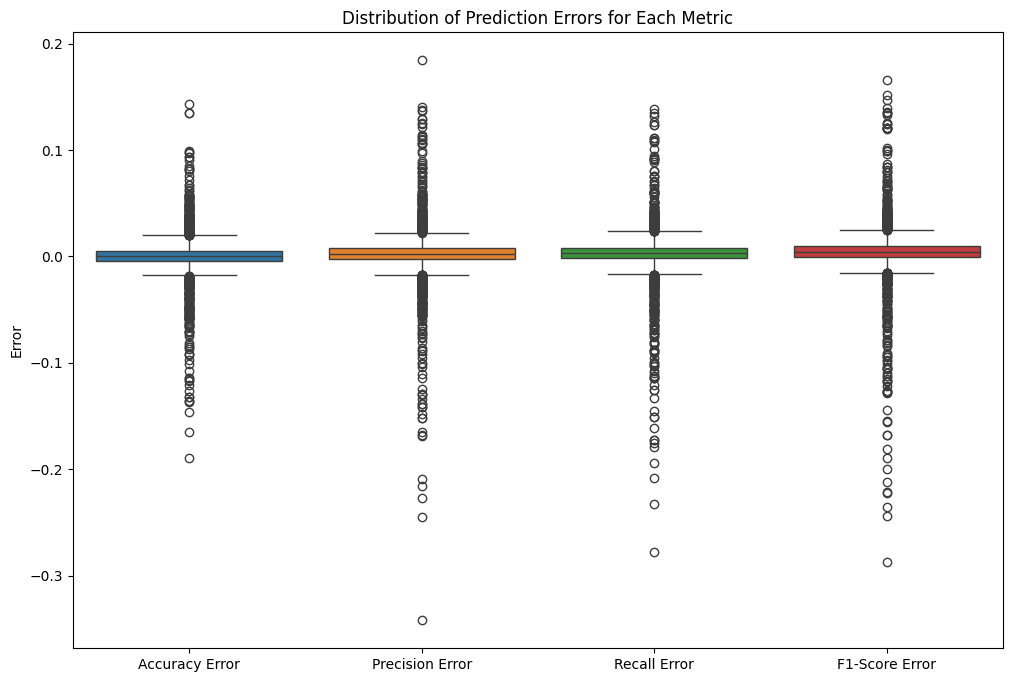

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate predictions
# Note: Ensure your input data is scaled if your model was trained on scaled data
predicted_values = model.predict(X_test_scaled)

# Step 2: Calculate errors for each metric
# Assuming y_test is a DataFrame with the same structure as the model's output
errors = y_test.to_numpy() - predicted_values

# Creating a DataFrame for easier manipulation
errors_df = pd.DataFrame(errors, columns=['Accuracy Error', 'Precision Error', 'Recall Error', 'F1-Score Error'])

# Step 3: Box plot for visualization of errors
plt.figure(figsize=(12, 8))
sns.boxplot(data=errors_df)
plt.title('Distribution of Prediction Errors for Each Metric')
plt.ylabel('Error')
plt.show()


**Neural Network Heatmap**

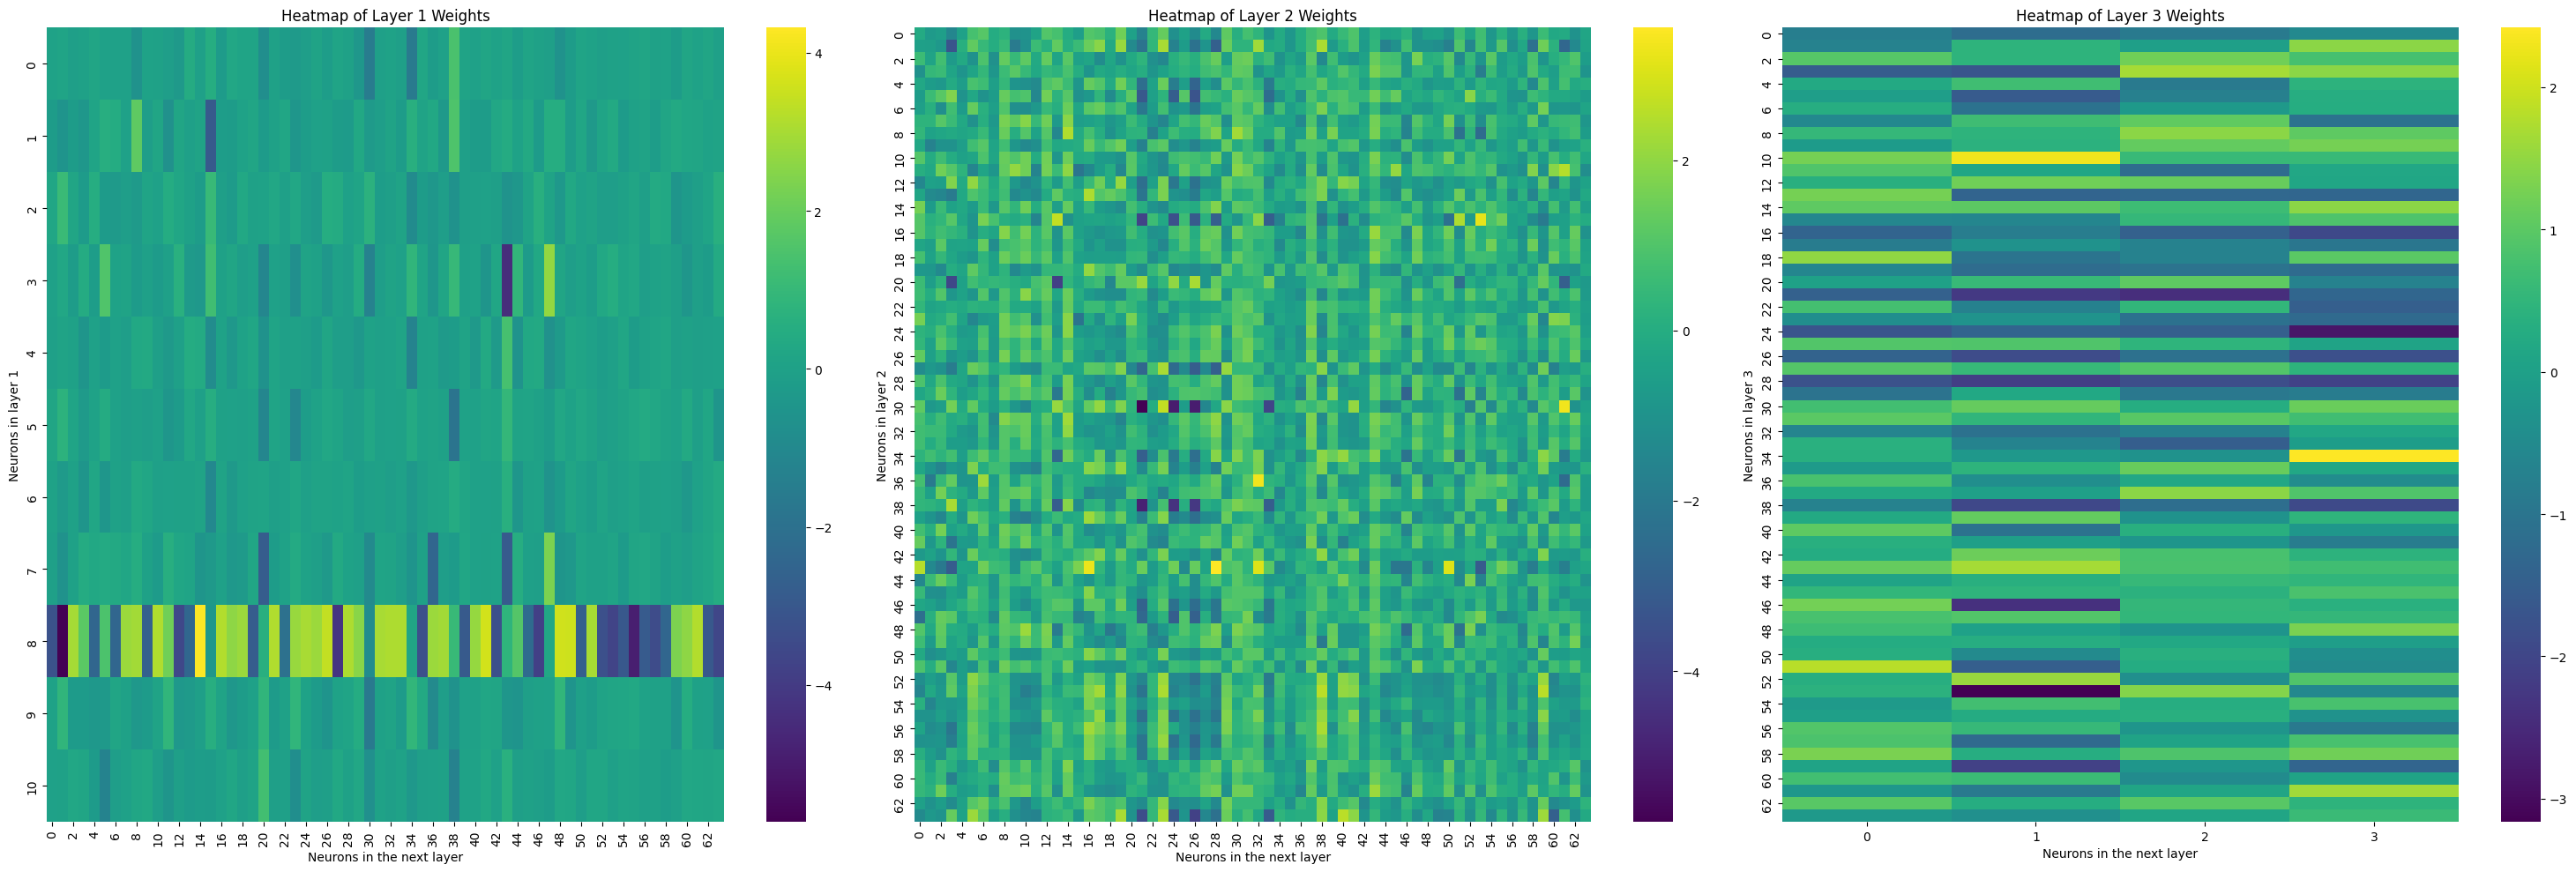

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your trained Keras model

# Function to plot the heatmap of weights for a given layer
def plot_layer_weights(layer_index, ax):
    # Get the weights of a specific layer
    weights = model.layers[layer_index].get_weights()[0]
    # Normalize the weights for better visualization
    normalized_weights = (weights - weights.mean()) / weights.std()
    # Plotting the heatmap
    sns.heatmap(normalized_weights, ax=ax, annot=False, cmap='viridis')
    ax.set_title(f'Heatmap of Layer {layer_index + 1} Weights')
    ax.set_xlabel('Neurons in the next layer')
    ax.set_ylabel(f'Neurons in layer {layer_index + 1}')

# Create subplots for the 1st, 2nd, and 3rd layer
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Plot heatmap for the first layer weights
plot_layer_weights(0, axes[0])

# Plot heatmap for the second layer weights
plot_layer_weights(1, axes[1])

# Plot heatmap for the third layer weights
plot_layer_weights(2, axes[2])

plt.tight_layout()
plt.show()

**Error Distribution**

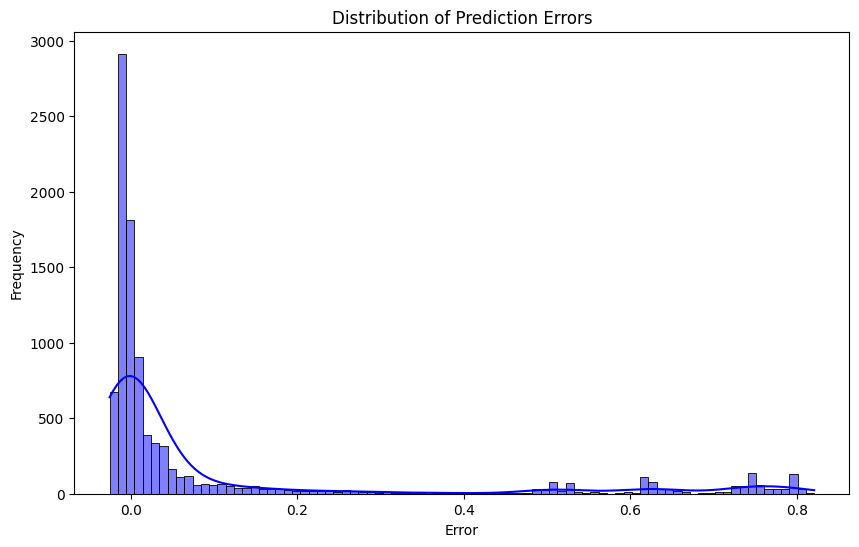

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' is your actual values and 'predicted_metrics' contains your model's predictions
# Calculate errors
errors = predicted_metrics - y_test.to_numpy()

# Flatten the errors array if it's multi-dimensional (for multi-output regression)
errors = errors.flatten()

# Plotting the error distribution
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue', binwidth=0.01)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


**ACCURACY**

76/76 [==============================] - 0s 1ms/step


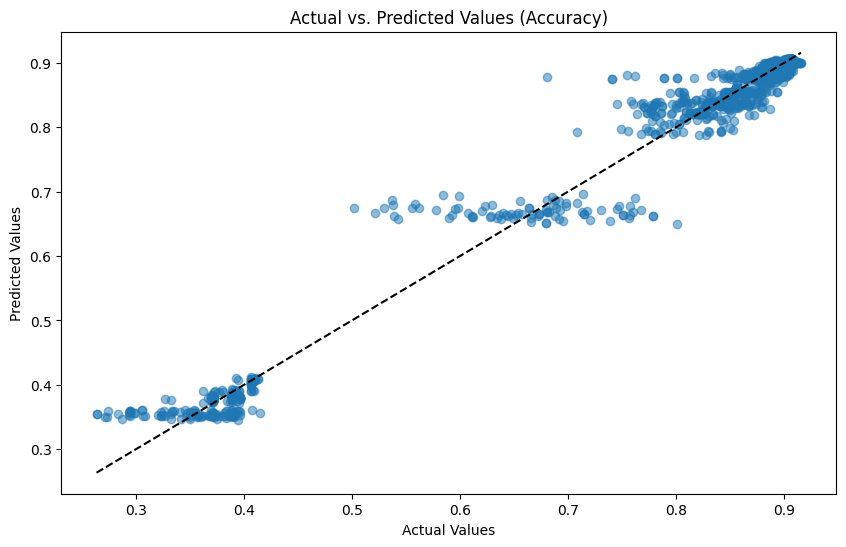

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred contains your model's predictions
y_pred = model.predict(X_test_scaled)

# For visualization, let's use one of the metrics, say 'Accuracy'. You can change this to 'Precision', 'Recall', 'F1-Score' based on your interest
actual = y_test['Accuracy'].values  # Replace 'Accuracy' with the metric of interest
predicted = y_pred[:,0]  # Change 0 to 1, 2, or 3 for 'Precision', 'Recall', 'F1-Score' respectively

plt.figure(figsize=(10,6))
plt.scatter(actual, predicted, alpha=0.5)
plt.title('Actual vs. Predicted Values (Accuracy)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--') # Diagonal line
plt.show()


**F1-Score**

76/76 [==============================] - 0s 3ms/step


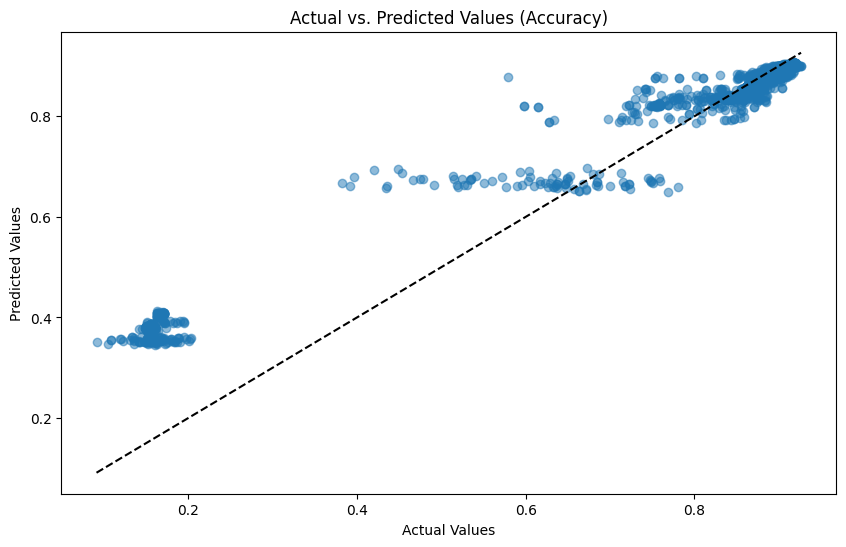

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred contains your model's predictions
y_pred = model.predict(X_test_scaled)

# For visualization, let's use 'F1-Score'
actual = y_test['F1-Score'].values
predicted = y_pred[:,3]  # Assuming that the 4th column in y_pred corresponds to 'F1-Score'

plt.figure(figsize=(10,6))
plt.scatter(actual, predicted, alpha=0.5)
plt.title('Actual vs. Predicted Values (F1-Score)')
plt.xlabel('Actual F1-Score Values')
plt.ylabel('Predicted F1-Score Values')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--') # Diagonal line represents perfect prediction
plt.show()


**Precision**

76/76 [==============================] - 0s 4ms/step


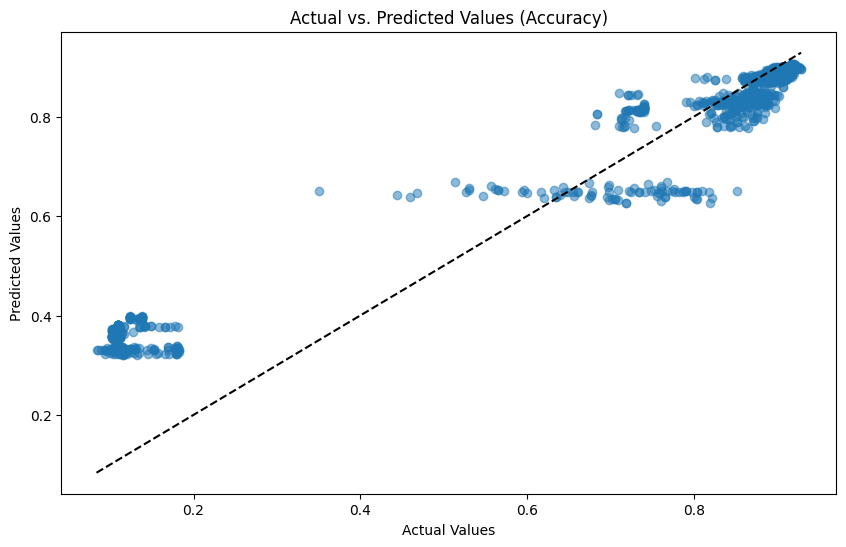

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred contains your model's predictions
y_pred = model.predict(X_test_scaled)

# For visualization, let's use one of the metrics, say 'Accuracy'. You can change this to 'Precision', 'Recall', 'F1-Score' based on your interest
actual = y_test['Precision'].values  # Replace 'Accuracy' with the metric of interest
predicted = y_pred[:,0]  # Change 0 to 1, 2, or 3 for 'Precision', 'Recall', 'F1-Score' respectively

plt.figure(figsize=(10,6))
plt.scatter(actual, predicted, alpha=0.5)
plt.title('Actual vs. Predicted Values (Precision)')
plt.xlabel('Actual Precision Values')
plt.ylabel('Predicted Precision Values')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--') # Diagonal line
plt.show()


**Recall**

76/76 [==============================] - 0s 1ms/step


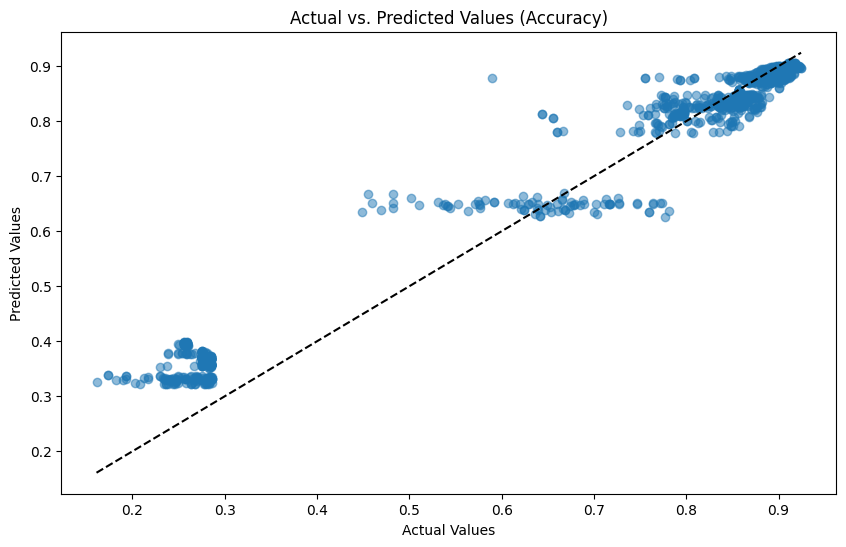

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred contains your model's predictions
y_pred = model.predict(X_test_scaled)

# For visualization, let's use one of the metrics, say 'Accuracy'. You can change this to 'Precision', 'Recall', 'F1-Score' based on your interest
actual = y_test['Recall'].values  # Replace 'Accuracy' with the metric of interest
predicted = y_pred[:,0]  # Change 0 to 1, 2, or 3 for 'Precision', 'Recall', 'F1-Score' respectively

plt.figure(figsize=(10,6))
plt.scatter(actual, predicted, alpha=0.5)
plt.title('Actual vs. Predicted Values (Recall)')
plt.xlabel('Actual Recall Values')
plt.ylabel('Predicted Recall Values')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--') # Diagonal line
plt.show()


#ANN-2 Testing

In [ ]:

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/preprocessed_dataset.csv')

# Assuming the dataset structure matches the expected format
X = data.drop(['Accuracy', 'Precision', 'Recall', 'F1-Score'], axis=1)
y = data[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the ANN model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(4, activation='sigmoid')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test))

# Interactive Hyperparameter Input
def get_user_input(scaler):
    # Example of capturing user input for hyperparameters
    # Extend this based on your actual hyperparameters
    inputs = {}
    inputs['Criterion'] = input("Enter Criterion (gini/entropy/log_loss): ")
    inputs['Splitters'] = input("Enter Splitters (best/random): ")
    inputs['Max Depth'] = int(input("Enter Max Depth: "))
    inputs['Min Samples Split'] = float(input("Enter Min Samples Split: "))
    inputs['Min Samples Leaf'] = float(input("Enter Min Samples Leaf: "))
    inputs['Max_Features'] = input("Enter Max_Features (log2/sqrt): ")
    # Convert these inputs to a DataFrame and apply any necessary preprocessing
    # This is a simplified example; you'll need to adjust preprocessing based on your actual needs
    input_df = pd.DataFrame([inputs])

    # One-hot encode 'Criterion' if it was one-hot encoded during training
    input_df = pd.get_dummies(input_df)

    # Ensure the input DataFrame has all the columns that the model expects
    # This step is crucial if your model expects specific one-hot encoded columns that might be missing
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[X.columns]  # Order columns as the model expects
    input_scaled = scaler.transform(input_df)  # Scale the input

    return input_scaled


# Prediction
user_input_scaled = get_user_input(scaler)
predicted_metrics = model.predict(user_input_scaled)
print(f"Predicted Performance Metrics: Accuracy={predicted_metrics[0][0]}, Precision={predicted_metrics[0][1]}, Recall={predicted_metrics[0][2]}, F1-Score={predicted_metrics[0][3]}")


#ANN-3 Testing

In [ ]:
# @title
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/preprocessed_dataset.csv')

# Assuming the dataset structure matches the expected format
X = data.drop(['Accuracy', 'Precision', 'Recall', 'F1-Score'], axis=1)
y = data[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the ANN model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test))

# Interactive Hyperparameter Input
def get_user_input(scaler):
    # Example of capturing user input for hyperparameters
    # Extend this based on your actual hyperparameters
    inputs = {}
    inputs['Criterion'] = input("Enter Criterion (gini/entropy): ")
    inputs['Max Depth'] = float(input("Enter Max Depth: "))
    inputs['Min Samples Split'] = float(input("Enter Min Samples Split: "))
    inputs['Min Samples Leaf'] = float(input("Enter Min Samples Leaf: "))

    # Convert these inputs to a DataFrame and apply any necessary preprocessing
    # This is a simplified example; you'll need to adjust preprocessing based on your actual needs
    input_df = pd.DataFrame([inputs])

    # One-hot encode 'Criterion' if it was one-hot encoded during training
    input_df = pd.get_dummies(input_df)

    # Ensure the input DataFrame has all the columns that the model expects
    # This step is crucial if your model expects specific one-hot encoded columns that might be missing
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[X.columns]  # Order columns as the model expects
    input_scaled = scaler.transform(input_df)  # Scale the input

    return input_scaled

# Prediction
user_input_scaled = get_user_input(scaler)
predicted_metrics = model.predict(user_input_scaled)
print(f"Predicted Performance Metrics: Accuracy={predicted_metrics[0][0]}, Precision={predicted_metrics[0][1]}, Recall={predicted_metrics[0][2]}, F1-Score={predicted_metrics[0][3]}")
